Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




# **Importing Required Libraries**

In [2]:
import numpy as np
import pandas as pd 
from pathlib import Path
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Input,Flatten,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model,to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# **Loading Images**

In [75]:
from tensorflow.keras.preprocessing import image
p = Path('./input/flowers-recognition/flowers')
dirs = p.glob('*')
image_data = []
labels = []
label_dict = {'dandelion':0,'daisy':1,'flowers':2,'sunflower':3,'tulip':4,'rose':5}
for folder_dir in dirs:
    label= str(folder_dir).split('\\')[-1]
    cnt = 0
    print(label)
    for image_path in folder_dir.glob('*.jpg'):
        img = image.load_img(image_path,target_size = (64,64))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
    

daisy
dandelion
rose
sunflower
tulip


In [76]:
print(len(image_data),len(labels))

4323 4323


In [77]:
x = np.array(image_data)
y = np.array(labels)

In [78]:
x.shape

(4323, 64, 64, 3)

In [79]:
y.shape

(4323,)

# Visualizing Images

In [80]:
def draw_flower(img,label):
    plt.imshow(img)
    plt.title(label)

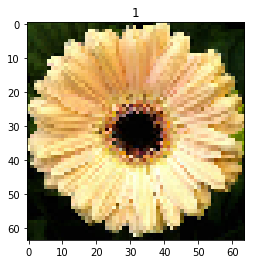

In [81]:
draw_flower(x[20]/255.0,y[20])

# Preprocessing

In [82]:
num_labels = len(np.unique(y))


In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.40)

In [84]:
x_train.shape

(2593, 64, 64, 3)

In [85]:
x_test.shape

(1730, 64, 64, 3)

In [86]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size,image_size,3])
x_test = np.reshape(x_test,[-1,image_size,image_size,3])
x_train = x_train/255.0
x_test = x_test/255.0

In [87]:
y_train = to_categorical(y_train)


# **Building a Convolutional Neural Network to Classify flowers**

In [88]:
np.unique(y_test)

array([0, 1, 3, 4, 5])

In [89]:
input_shape = (64,64,3)
inputs = Input(shape = input_shape)
x = inputs
x = Conv2D(32,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(64,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)


x = Conv2D(128,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = Conv2D(256,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
outputs = Dense(6,activation = 'softmax')(x)
flower_classifier = Model(inputs,outputs)

flower_classifier.summary()
plot_model(flower_classifier)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       32896     
_________

In [90]:
flower_classifier.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [91]:
y_train.shape

(2593, 6)

In [92]:
flower_classifier.fit(x_train,y_train,batch_size = 128,epochs = 30)


Epoch 1/30
2593/2593 [==============================] - 22s 9ms/sample - loss: 1.4971 - acc: 0.3440
Epoch 2/30
2593/2593 [==============================] - 23s 9ms/sample - loss: 1.1741 - acc: 0.5021
Epoch 3/30
2593/2593 [==============================] - 23s 9ms/sample - loss: 1.0461 - acc: 0.5827
Epoch 4/30
2593/2593 [==============================] - 23s 9ms/sample - loss: 1.0254 - acc: 0.5901
Epoch 5/30
2593/2593 [==============================] - 23s 9ms/sample - loss: 0.9278 - acc: 0.6444
Epoch 6/30
2593/2593 [==============================] - 23s 9ms/sample - loss: 0.8545 - acc: 0.6714
Epoch 7/30
2593/2593 [==============================] - 23s 9ms/sample - loss: 0.7990 - acc: 0.6973
Epoch 8/30
2593/2593 [==============================] - 24s 9ms/sample - loss: 0.7125 - acc: 0.7362
Epoch 9/30
2593/2593 [==============================] - 23s 9ms/sample - loss: 0.6732 - acc: 0.7486
Epoch 10/30
2593/2593 [==============================] - 22s 9ms/sample - loss: 0.5954 - acc: 0.7833

In [98]:
x_test[0].shape

(64, 64, 3)

In [100]:
test_case = flower_classifier.predict(x_test)
test_case

array([[9.4328582e-01, 3.7887939e-03, 1.0565560e-13, 1.0496362e-02,
        1.4179018e-02, 2.8249836e-02],
       [1.9493646e-05, 4.9267831e-01, 1.1285896e-15, 1.3537881e-04,
        4.9423057e-01, 1.2936205e-02],
       [3.9527723e-18, 3.0429860e-11, 8.6413299e-32, 1.1973372e-11,
        6.9010198e-01, 3.0989796e-01],
       ...,
       [5.9589818e-09, 8.0899099e-08, 5.9346858e-24, 2.5567280e-07,
        9.9823511e-01, 1.7645169e-03],
       [2.3987184e-13, 3.5214073e-06, 3.9762854e-27, 5.6797969e-12,
        9.2463923e-01, 7.5357206e-02],
       [9.3609434e-01, 8.7455142e-04, 4.0099015e-18, 2.0367863e-06,
        2.5245266e-02, 3.7783921e-02]], dtype=float32)

In [101]:
y_test_pred = np.argmax(test_case,axis = 1)

In [102]:
y_test_pred

array([0, 4, 4, ..., 4, 4, 0], dtype=int64)

In [103]:
for i in range(50):
    print("actual",y_test[i],"predicted",y_test_pred[i])

actual 0 predicted 0
actual 4 predicted 4
actual 4 predicted 4
actual 0 predicted 0
actual 5 predicted 5
actual 4 predicted 4
actual 0 predicted 0
actual 0 predicted 0
actual 5 predicted 5
actual 5 predicted 4
actual 0 predicted 0
actual 3 predicted 3
actual 3 predicted 3
actual 4 predicted 1
actual 3 predicted 3
actual 3 predicted 3
actual 0 predicted 1
actual 0 predicted 3
actual 3 predicted 4
actual 3 predicted 3
actual 0 predicted 0
actual 0 predicted 4
actual 1 predicted 0
actual 1 predicted 1
actual 4 predicted 0
actual 1 predicted 0
actual 1 predicted 1
actual 3 predicted 3
actual 4 predicted 4
actual 1 predicted 1
actual 0 predicted 0
actual 3 predicted 3
actual 0 predicted 1
actual 1 predicted 1
actual 3 predicted 1
actual 5 predicted 5
actual 0 predicted 0
actual 4 predicted 4
actual 3 predicted 3
actual 0 predicted 0
actual 1 predicted 0
actual 4 predicted 0
actual 5 predicted 5
actual 4 predicted 4
actual 1 predicted 1
actual 3 predicted 3
actual 4 predicted 5
actual 1 pred